MODEL KNN

In [26]:
# importy bibliotek

import numpy as np
import pandas as pd

from imblearn.over_sampling import SMOTEN
import time
import os

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


from sklearn import neighbors, datasets
from sklearn.datasets import load_boston
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import make_pipeline

In [8]:
# wczytanie zbioru
df = pd.read_csv(os.path.join(os.getcwd(), 'clean_dataset.csv'))

In [9]:
df.columns

Index(['Unnamed: 0', 'basket_icon_click', 'basket_add_list',
       'basket_add_detail', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'sign_in', 'saw_checkout', 'saw_homepage',
       'ordered'],
      dtype='object')

In [10]:
# podział na zmienne objaśniające i zmienną objaśnianą-target dla każdego zbioru
X = df.drop(['Unnamed: 0', 'ordered'], axis=1)
y = df['ordered']

In [12]:
# podział zbioru "treningowego" na zbiór treningowy i testowy
# rezygnujemy z oryginalnego zbioru testowego 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y)

In [13]:
# oversampling przy użyciu metody SMOTE
smote = SMOTEN (random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [14]:
#sprawdzenie zbalansowania
y_train_smote.value_counts(normalize=True)

0    0.5
1    0.5
Name: ordered, dtype: float64

Zbiór danych został zbalansowany w stosunku 50/50 

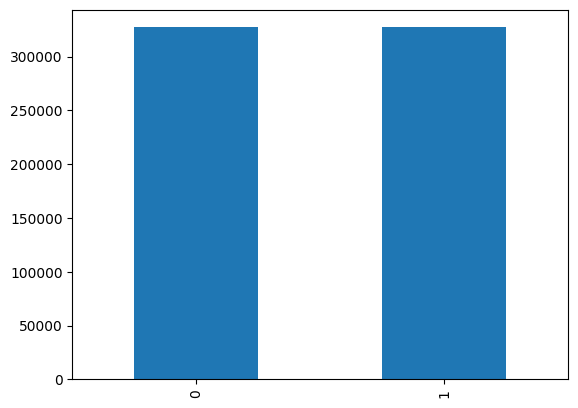

In [15]:
# przedstawienie zbalansowania na wykresie
pd.Series(y_train_smote).value_counts().plot.bar();

In [16]:
# stworzenie instancji klasyfikatora KNN
n_neighbors = 5
knn = neighbors.KNeighborsClassifier(
    n_neighbors,
    weights='uniform', 
    algorithm='auto'
    )

In [22]:
# konstrukcja pipeline'u 
knn_pipeline = make_pipeline(MinMaxScaler(), knn)    # nowy koncept

In [23]:
# trenowanie modelu z pomiarem czasu
start = time.time()
knn_pipeline.fit(X_train_smote, y_train_smote)
end = time.time()
print("Czas treningu modelu KNN: ", end - start)

Czas treningu modelu KNN:  2.7239675521850586


In [24]:
# predykcja modelu na zbiorze testowym
y_pred = knn_pipeline.predict(X_test)

d:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [28]:
class_report_knn = classification_report(y_test, y_pred, output_dict = True )
df_class_report_knn = pd.DataFrame(class_report_knn).transpose()
df_class_report_knn.to_html('class_report_knn.html')
print(df_class_report_knn)


              precision    recall  f1-score        support
0              0.998314  0.993418  0.995860  109078.000000
1              0.864732  0.961659  0.910624    4773.000000
accuracy       0.992086  0.992086  0.992086       0.992086
macro avg      0.931523  0.977538  0.953242  113851.000000
weighted avg   0.992714  0.992086  0.992286  113851.000000


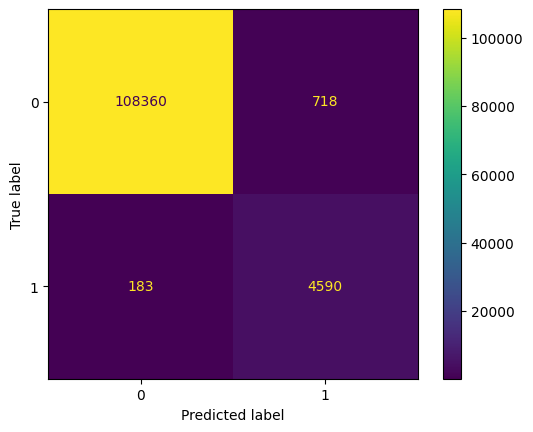

In [30]:
cm_knn = confusion_matrix(y_test, y_pred)
disp_cm_knn = ConfusionMatrixDisplay(cm_knn)
disp_cm_knn.plot();
plt.savefig('cm_knn.png')